In [1]:
import pandas as pd 
import numpy as np  
import random
import math
import time
import datetime
import operator 
import sys

#Data Vizualization
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode, iplot,plot

pio.templates.default ='presentation'

#Modeling
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, mean_squared_error as mse, mean_absolute_error as mae, classification_report 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, KFold, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
!pip install xgboost
from catboost import CatBoostClassifier
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from plotly.offline import plot, iplot, init_notebook_mode
from colorama import Fore, Back, Style 
init_notebook_mode(connected=True)
import warnings

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 200)

warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv(r"C:\Users\admin\Desktop\dishwa\pm\pm project\heart_failure_clinical_records_dataset - heart_failure_clinical_records_dataset.csv")
df.head()

cafe_colors = ['rgb(79, 129, 102)', 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
pio.templates.default = 'presentation'
labels = ['Yes, Survived', 'No, Died']
values = [len(df[df['DEATH_EVENT'] == 0]), len(df[df['DEATH_EVENT'] == 1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=cafe_colors, hole=.2)])
fig.update_layout(
    title_text='Distribution of Death Events in Patients', title_x=0.47)
fig.show()

In [3]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [25]:
labels = ['Non-Diabetic', 'Diabetic']
values = [len(df[df['diabetes'] == 0]), len(df[df['diabetes'] == 1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=cafe_colors, hole=.2)])
fig.update_layout(
    title_text='Distribution of Diabetic Patients', title_x=0.47)
fig.show()

In [26]:
age_sex = df.filter(items=['sex', 'age'])
m = age_sex["sex"] != 1
a, b = age_sex[m], age_sex[~m]
a = a['age'].values
b = b['age'].values

hist_data = [a, b]
group_labels  = ['Female', 'Male']
fig = ff.create_distplot(hist_data, group_labels, colors = cafe_colors, bin_size=0.6)
fig.update_layout(title_text='Age Distribution', title_x=0.47)
fig.show()

In [27]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]


male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]
labels = ['Survived','Died']
values1 = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1])]
values2 = [len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Male', 'Female'])

fig.add_trace(go.Pie(labels=labels, values=values1, hole=.3, marker_colors=cafe_colors), 1,1)
fig.add_trace(go.Pie(labels=labels, values=values2, hole=.3, marker_colors=cafe_colors), 1,2)
fig.update_layout(
    title_text="Analysis on Survival - Sex", title_x=0.45)
fig.show()
#From a cursory glance that both males and females experience a Death Event at similar rates. Only 0.4 of Females are more 
#likely to pass away from this population of patients

In [28]:
surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Died']
fig = ff.create_distplot(hist_data, group_labels, colors = cafe_colors, bin_size=0.6)
fig.update_layout(
    title_text="Analysis in Age on Survival Status", title_x=0.47)
fig.show()
#As one would expect age does seem to play a stronger role in wheter a Death Event will occur. Once a patient hits about 
#70 years of age the survial rate is overtaken by the death rate

In [29]:
surv = df[df['DEATH_EVENT']==0]['serum_creatinine']
not_surv = df[df['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Died']
fig = ff.create_distplot(hist_data, group_labels, colors = cafe_colors, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status", title_x=0.47)
fig.show()
#Serum Creatinine Levels definitley have a role to play in survival or death with heart failure, once your levels pass 
#roughly 1.5 MG/DL the chances of a death event overtake that of survival, however what sticks out to me is how expedient 
#the drop is if you have levels higher than 1-1.5.

In [30]:
surv = df[df['DEATH_EVENT']==0]['serum_sodium']
not_surv = df[df['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Died']
fig = ff.create_distplot(hist_data, group_labels, colors = cafe_colors, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status", title_x=0.47)
fig.show()
# Serum Sodium Levels like Serum Creatine definitley has an impact on survival or death with heart failure, Like Creatine, 
#there is somewhat of a safety pocket which lies between 136-142 mEq/ls. It appears that it is a bit safer to be hight than
#the median than lower.

In [31]:
surv = df[df['DEATH_EVENT']==0]['ejection_fraction']
not_surv = df[df['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Died']
fig = ff.create_distplot(hist_data, group_labels, colors = cafe_colors, bin_size=0.9)
fig.update_layout(
    title_text="Analysis in Ejection Fraction on Survival Status", title_x=0.47)
fig.show()
# Ejection Fraction seems to be one of the factors that plays a role in death or life, thos with lower levels are without 
#question more likely to pass away, it appears that having to low a percentage of blood leaving the heart is where it can 
#lead to a Death Event and when the percentage is in between 30% and 45% survival chances are higher. However it does appear 
#that once you get higher than 45% it has little effect on the patients outcome

In [32]:
fig = px.violin(df, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns, color_discrete_sequence=cafe_colors)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status",
                  title_x=0.47, legend_title='', yaxis_title="Age",
                  xaxis = dict(
                      title='',
                      tickmode = 'array',
                      tickvals = [0, 1],
                      ticktext = ["Non Smoker", "Smoker"]
                  ))
fig.data[1].name="Died"
fig.data[0].name="Survived"
fig.show()

yes = df[df['smoking']==1]
no = df[df['smoking']==0]

labels = ['Survived','Died']
values1 = [len(yes[df["DEATH_EVENT"]==0]),len(yes[df["DEATH_EVENT"]==1])]
values2 = [len(no[df["DEATH_EVENT"]==0]),len(no[df["DEATH_EVENT"]==1])]
#fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=cafe_colors, hole=.4)])
#fig.update_layout(
#    title_text="Analysis on Survival - Diabetes", title_x=0.44)
#fig.show()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Non-Smoker', 'Smoker'])

fig.add_trace(go.Pie(labels=labels, values=values2, hole=.3, marker_colors=cafe_colors), 1,1)
fig.add_trace(go.Pie(labels=labels, values=values1, hole=.3, marker_colors=cafe_colors), 1,2)
fig.update_layout(
    title_text="Analysis on Survival - Smoking", title_x=0.45)
fig.show()
# It is interesting that those who smoke seem to die at a lower rate than those who are non-smokers. In fact the highest 
#average age is amongst those who smoke and survive heart failure. I will be honest this not something that I expected

In [33]:
fig = px.violin(df, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all",color_discrete_sequence=cafe_colors, hover_data=df.columns)
fig.update_layout(title_text="Analysis on Age and Diabetes on Survival Status",
                  title_x=0.45, legend_title='', yaxis_title="Age",
                  xaxis = dict(
                      title='',
                      tickmode = 'array',
                      tickvals = [0, 1],
                      ticktext = ["Non-Diabetic", "Diabetic"]
                  ))
fig.data[1].name="Died"
fig.data[0].name="Survived"
fig.show()
# The median age for those who are Non Diabetic and Survived is almost 10 years higher than all other subsets. However both 
#Diabetic and Non-Diabetic patients who had a death event is roughtly the same so it probably plays a little role but not as 
#profound as some of the other factors

In [34]:
yes = df[df['diabetes']==1]
no = df[df['diabetes']==0]
yes_survi = yes[df["DEATH_EVENT"]==0]
yes_not_survi = yes[df["DEATH_EVENT"]==1]
no_survi = no[df["DEATH_EVENT"]==0]
no_not_survi = no[df["DEATH_EVENT"]==1]

labels = ['Survived','Died']
values1 = [len(yes[df["DEATH_EVENT"]==0]),len(yes[df["DEATH_EVENT"]==1])]
values2 = [len(no[df["DEATH_EVENT"]==0]),len(no[df["DEATH_EVENT"]==1])]
#fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=cafe_colors, hole=.4)])
#fig.update_layout(
#    title_text="Analysis on Survival - Diabetes", title_x=0.44)
#fig.show()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Diabetic', 'Non-Diabetic'])

fig.add_trace(go.Pie(labels=labels, values=values1, hole=.3, marker_colors=cafe_colors), 1,1)
fig.add_trace(go.Pie(labels=labels, values=values2, hole=.3, marker_colors=cafe_colors), 1,2)
fig.update_layout(
    title_text="Analysis on Survival - Diabetes", title_x=0.45)
fig.show()
#When we look at those who are diabetic and those who are not from this angle it is pretty clear that Diabetes and a Death 
#Event are quite unlikely to be strongly correlated

In [35]:
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Creatinine Phosphokinase',
                                 values=df['creatinine_phosphokinase']),
                            dict(label='Age',
                                 values=df['age']),
                            dict(label='Platelets',
                                 values=df['platelets']),
                            dict(label='Serum Creatinine',
                                 values=df['serum_creatinine']),
                            dict(label='Ejection Fraction',
                                 values=df['ejection_fraction']),
                            dict(label='Serum Sodium',
                                 values=df['serum_sodium']),
                            dict(label='Time',
                                 values=df['time'])],
                showupperhalf=False, 
                text=df['DEATH_EVENT'],marker=dict(color=df['DEATH_EVENT'],
                            showscale=False, 
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(height=950, 
                  title={'text': "Feature Relationships",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'font_size': 28})

fig.show()
    

In [36]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
display(skew_cols.to_frame().rename(columns={0:'Skewness'}))

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

,Skewness
creatinine_phosphokinase,4.463110
serum_creatinine,4.455996
platelets,1.462321
DEATH_EVENT,0.770349
smoking,0.770349
high_blood_pressure,0.626732
ejection_fraction,0.555383
sex,-0.626732
serum_sodium,-1.048136


A skewness value of   0.42306190672863536  means that the distribution is approx.   symmetric 
A skewness value of   0.2782606644055605  means that the distribution is approx.   symmetric 
A skewness value of   4.463110084653752  means that the distribution is approx.   highly skewed 
A skewness value of   0.3339286842537603  means that the distribution is approx.   symmetric 
A skewness value of   0.5553827516973211  means that the distribution is approx.   moderately skewed 
A skewness value of   0.6267318547287857  means that the distribution is approx.   moderately skewed 
A skewness value of   1.4623208382757793  means that the distribution is approx.   highly skewed 
A skewness value of   4.455995882049026  means that the distribution is approx.   highly skewed 
A skewness value of   -1.0481360160574988  means that the distribution is approx.   highly skewed 
A skewness value of   -0.6267318547287857  means that the distribution is approx.   highly skewed 
A skewness value of   0

In [37]:
def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
df_skew = skew_autotransform(df.copy(deep=True), plot = True, exp = False, threshold = 0.5)

In [38]:
print('Original Dataframe')
heatmaps_tri(df)
print('Skewed Dataframe')
heatmaps_tri(df_skew)
def corrdfs(data):
    co = data.corr()
    dcorr = co.iloc[12]
    dcdf =  pd.DataFrame(dcorr).reset_index().rename(columns={'index':'variable','DEATH_EVENT':'correlation'})
    
    return dcdf
cor1 = corrdfs(data = df)
cor2 = corrdfs(data = df_skew)
cor = cor1.merge(cor2, how='outer', on='variable').rename(columns={'correlation_x':'original_corr','correlation_y':'skew_corr'})
cor['difference'] = (cor['original_corr']-cor['skew_corr']).round(4)
display(cor.sort_values(by='difference'))

Original Dataframe


NameError: name 'heatmaps_tri' is not defined

In [39]:
## Train Test Split
Features = ['time','ejection_fraction','serum_creatinine','age', 'serum_sodium']
x = df[Features].values
y = df["DEATH_EVENT"].values
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

accuracy_list = []

In [40]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

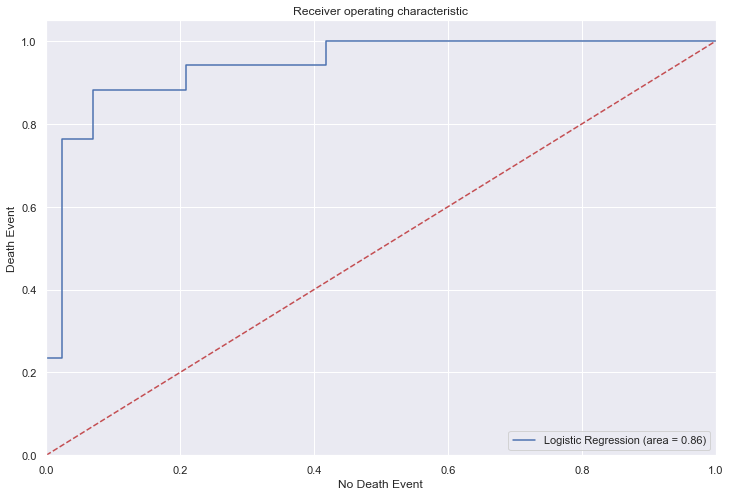

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))

#create ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('No Death Event')
plt.ylabel('Death Event')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

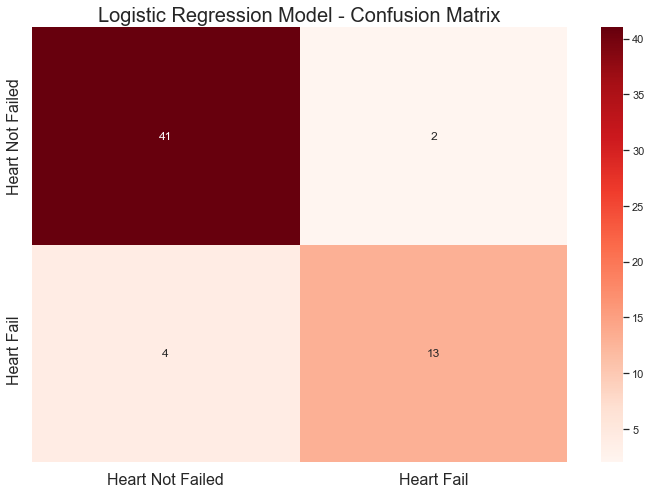

Accuracy of Logistic Regression is :  90.00%


In [42]:
lr_cm=confusion_matrix(y_test, log_reg_pred)
sns.set(rc={"figure.figsize":(12, 8)})
ax1 = sns.heatmap(lr_cm, annot=True, cmap='Reds')
ax1.set_title("Logistic Regression Model - Confusion Matrix", fontsize=20)
ax1.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax1.yaxis.set_ticklabels(["Heart Not Failed","  Heart Fail"], fontsize=16)
plt.show()
print(Fore.RED + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

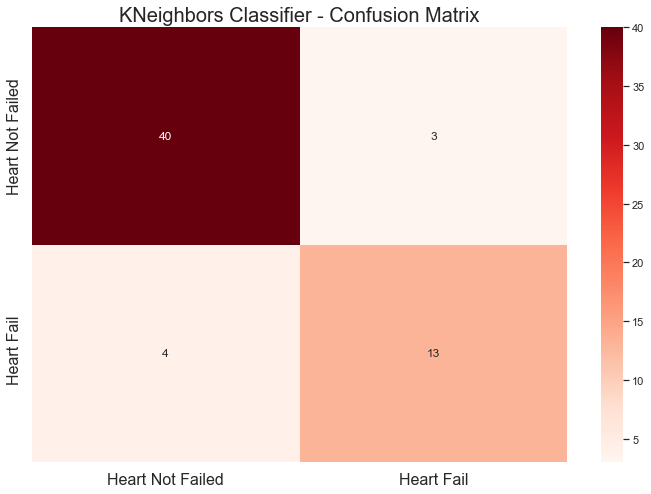

Accuracy of KNeighbors Classifer: 88.33%


In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_predict)
accuracy_list.append(100*knn_acc)
knn_cm = confusion_matrix(y_test, knn_predict)
sns.set(rc={'figure.figsize':(12,8)})
ax4 = sns.heatmap(knn_cm, annot=True, cmap='Reds')
ax4.set_title("KNeighbors Classifier - Confusion Matrix", fontsize=20)
ax4.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax4.yaxis.set_ticklabels(["Heart Not Failed","  Heart Fail"], fontsize=16)
plt.show()
print(Fore.RED+ "Accuracy of KNeighbors Classifer:", "{:.2f}%".format(100*knn_acc))

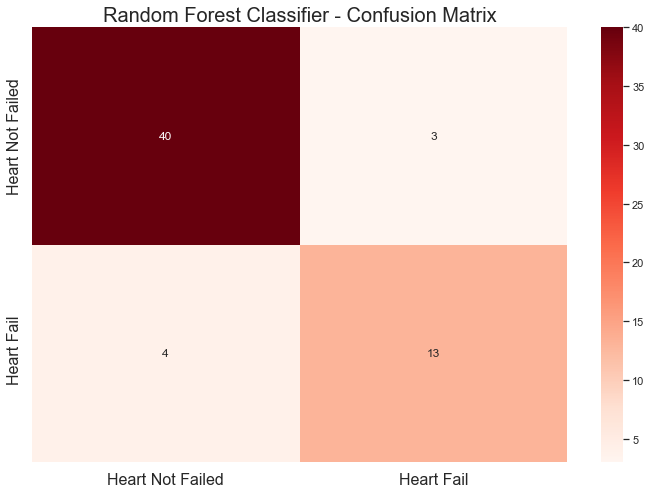

Accuracy of Random Forest Classifer: 88.33%


In [44]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
accuracy_list.append(100*rfc_acc)
rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.set(rc={'figure.figsize':(12,8)})
ax6 = sns.heatmap(rfc_cm, annot=True, cmap='Reds')
ax6.set_title("Random Forest Classifier - Confusion Matrix", fontsize=20)
ax6.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax6.yaxis.set_ticklabels(["Heart Not Failed","  Heart Fail"], fontsize=16)
plt.show()
print(Fore.RED+ "Accuracy of Random Forest Classifer:", "{:.2f}%".format(100*rfc_acc))

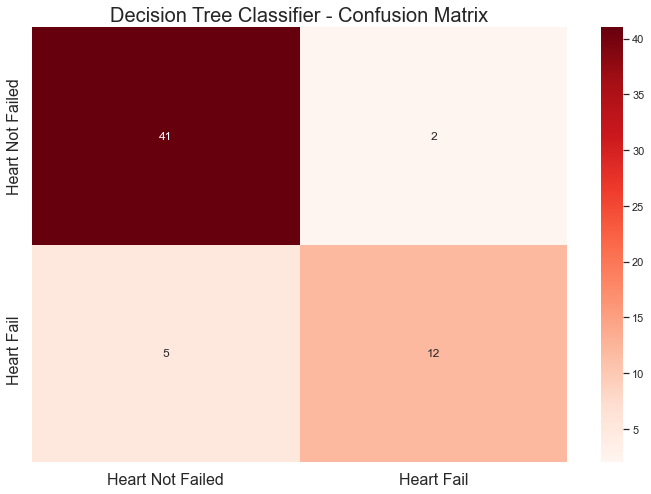

Accuracy of Decision Tree Classifier: 88.33%


In [45]:
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=3, random_state=0, criterion='entropy')
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)
dt_cm = confusion_matrix(y_test, dt_pred)
sns.set(rc={'figure.figsize':(12,8)})
ax7 = sns.heatmap(dt_cm, annot=True, cmap='Reds')
ax7.set_title("Decision Tree Classifier - Confusion Matrix", fontsize=20)
ax7.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"], fontsize=16)
ax7.yaxis.set_ticklabels(["Heart Not Failed","  Heart Fail"], fontsize=16)
plt.show()
print(Fore.RED+ "Accuracy of Decision Tree Classifier:", "{:.2f}%".format(100*dt_acc))

In [46]:
accuracy = accuracy_list
models = ['Logistic Regression', 'KNearestNeighbors', 'Random Forrest', 'Decision Tree']
madict = dict(zip(models, accuracy))
fdf = pd.DataFrame.from_dict(madict, orient='index').reset_index()
fdf.columns=['Model','Accuracy']
maf = fdf.sort_values(by='Accuracy', ascending=False)
maf

,Model,Accuracy
0,Logistic Regression,90.000000
1,KNearestNeighbors,88.333333
2,Random Forrest,88.333333
3,Decision Tree,88.333333


In [47]:
fig = px.bar(maf, x = 'Model', y = 'Accuracy', 
             color='Accuracy',  color_continuous_scale=['green','red'],
            hover_name="Accuracy", hover_data=maf.columns)
fig.update_layout(title={'text':'Accuracy Scores', 'x':0.5}, height=800)


fig.show()